#**Online Vehicle Booking Market Segmentation**

In [ ]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dframe = pd.read_csv('/content/car data.csv')

##**EDA**

In [ ]:
dframe.shape

(301, 9)

In [ ]:
dframe.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# Column-wise information of the dataframe which states the number of null objects and type of the objects

dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


No Null values in any of the feature available

In [ ]:
# Summary or analysis of the numberical values of the dataframe

dframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


***Year:***
The dataset contains information on vehicles from the year 2003 to 2018.
The majority of vehicles in the dataset fall within the range of 2012 to 2016.

***Selling_Price:***
The selling prices of the vehicles in the dataset vary widely, with a minimum price of 0.10 and a maximum price of 35.0.
The median (50th percentile) selling price is 3.6, indicating that there is a mix of lower and higher-priced vehicles.

***Present_Price:***
The present prices of the vehicles also show significant variation, ranging from 0.32 to 92.6.
The median (50th percentile) present price is 6.4.

***Kms_Driven:*** *italicized text*
The dataset includes vehicles with a wide range of kilometers driven, from 500 to 500,000.
The median (50th percentile) kilometers driven is 32,000, indicating that many vehicles have relatively moderate mileage.

***Owner:***
The 'Owner' feature indicates the number of previous owners a vehicle has had.
The majority of vehicles in the dataset have 0 previous owners (indicating they are likely first-hand vehicles).

###**Vehicle Age Segmentation**

In [ ]:
# Demographic segmentation using the 'Year' feature
# Define age groups
import datetime
def categorize_age(year):
    current_year = datetime.datetime.now().year
    age = current_year - year

    if age <= 5:
        return "New"
    elif 5 < age <= 10:
        return "Mid-age"
    else:
        return "Old"

In [ ]:
# Assigning the classes based on the percentile it coveres

dframe['AgeCategory'] = dframe['Year'].apply(lambda value : categorize_age(value))

In [ ]:
dframe

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,AgeCategory
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Mid-age
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Mid-age
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Mid-age
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Old
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Mid-age
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,Mid-age
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,Mid-age
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,Old
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,Mid-age


In [ ]:
dframe['Age_Category'] = dframe['Year'].apply(categorize_age)
age_category_counts = dframe['Age_Category'].value_counts()
print("Age category-wise counts:")
print(age_category_counts)

Age category-wise counts:
Mid-age    217
Old         83
New          1
Name: Age_Category, dtype: int64


In [ ]:
# Checking whats the range of the date for which data is given to us

print("Maximum Date: ", max(dframe['Year']))
print("Minimum Date: ", min(dframe['Year']))

Maximum Date:  2018
Minimum Date:  2003


In [ ]:
# All unique Years

print(dframe['Year'].unique())

[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]


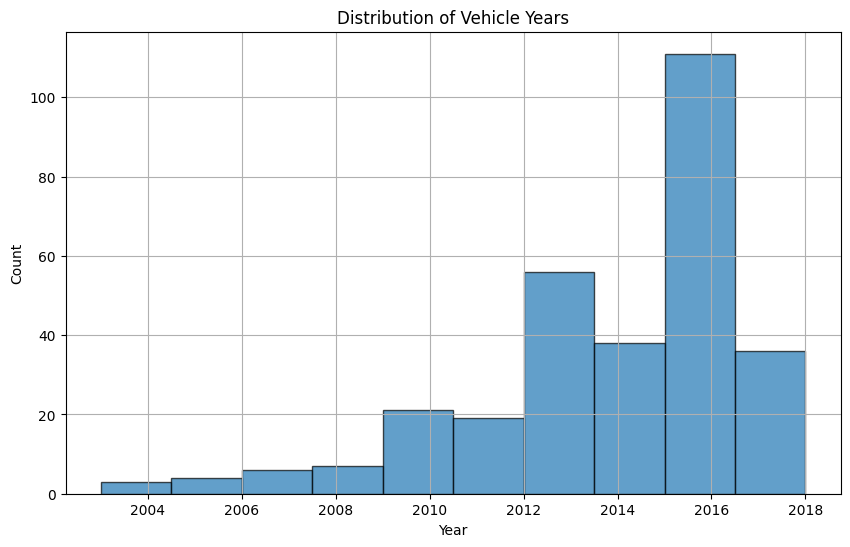

In [ ]:

# Create a histogram to visualize the distribution of vehicle years
plt.figure(figsize=(10, 6))
plt.hist(dframe['Year'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of Vehicle Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)

In [ ]:
# Segment customers based on their preference for new or used cars
dframe['AgeCategory'] = pd.cut(dframe['Year'], bins=[2000, 2010, 2020], labels=['Used', 'New'])


In [ ]:
# Count the number of customers in each age category
age_category_counts = dframe['AgeCategory'].value_counts()

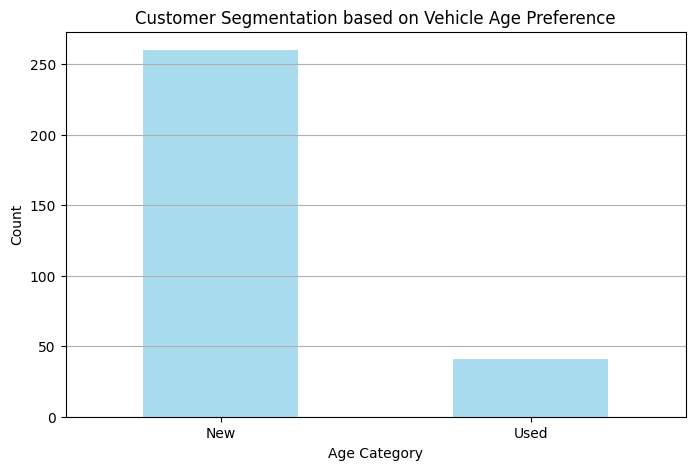

In [ ]:
# Plot a bar chart to visualize the customer segmentation
plt.figure(figsize=(8, 5))
age_category_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Customer Segmentation based on Vehicle Age Preference')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

##**Fuel Type Segmentation**

In [ ]:
# Calculate the count of vehicles for each fuel type
fuel_type_counts = dframe['Fuel_Type'].value_counts()
fuel_type_counts

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
# Analyze the impact of Fuel_Type on selling prices
fuel_type_demand = dframe.groupby('Fuel_Type')['Kms_Driven'].mean().sort_values(ascending=False)

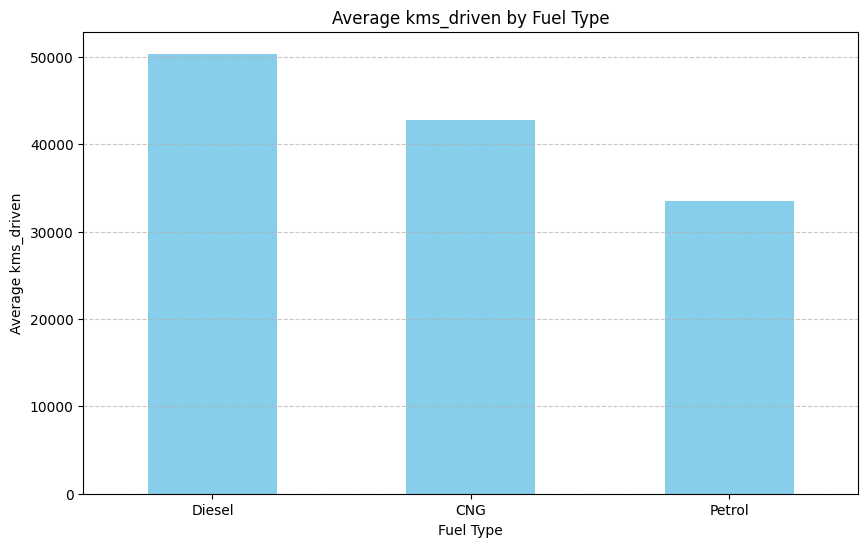

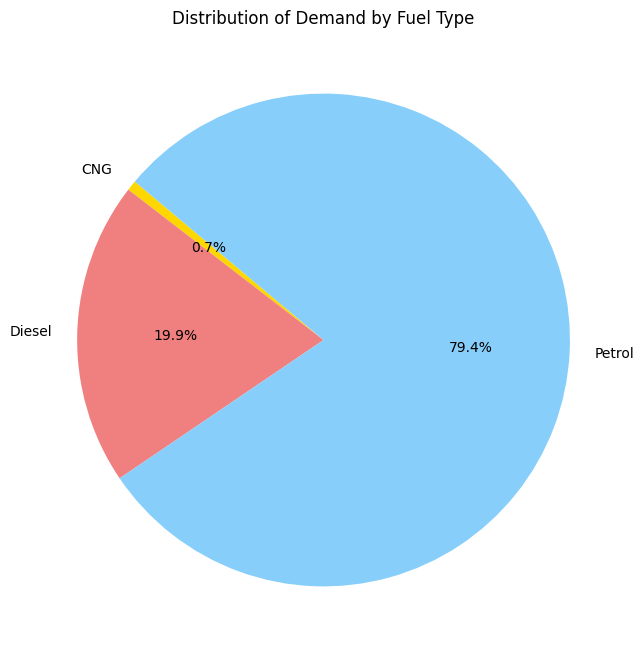

In [ ]:
# Create a bar plot to visualize the average selling prices by Fuel_Type
plt.figure(figsize=(10, 6))
fuel_type_demand.plot(kind='bar', color='skyblue')
plt.title('Average kms_driven by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average kms_driven')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Analyze the impact of Fuel_Type on demand (you can use different metrics)
fuel_type_demand = dframe.groupby('Fuel_Type').size()

# Create a pie chart to visualize the distribution of demand by Fuel_Type
plt.figure(figsize=(8, 8))
plt.pie(fuel_type_demand, labels=fuel_type_demand.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue'])
plt.title('Distribution of Demand by Fuel Type')

plt.show()


###**Car Brand Segmentation**

***Question Answered:*** Which Car brands (luxury/budget/mid range/premium) is preffered the most by customers in online booking

In [ ]:
import pandas as pd

# Assuming you have already loaded your dataset as 'dframe' based on the data you provided

# Analyze price variations across different brands in the context of the cab booking market
brand_price_comparison = dframe.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

# Create an empty list to store the brand segments
brand_segments = []

# Define the price segments and corresponding price ranges
budget_range = (0, 5)
mid_range = (5, 10)
premium_range = (10, 20)
luxury_range = (20, float('inf'))

# Categorize brands into price segments using if-else statements
for brand, avg_price in brand_price_comparison.items():
    if avg_price <= budget_range[1]:
        segment = 'Budget'
    elif avg_price <= mid_range[1]:
        segment = 'Mid-Range'
    elif avg_price <= premium_range[1]:
        segment = 'Premium'
    else:
        segment = 'Luxury'
    brand_segments.append((brand, segment))

# Create a DataFrame to show each car brand and its corresponding price segment
brand_segments_df = pd.DataFrame(brand_segments, columns=['Car_Brand', 'Price_Segment'])

# Display the brand segments
print(brand_segments_df)


              Car_Brand Price_Segment
0          land cruiser        Luxury
1              fortuner       Premium
2                innova       Premium
3                 creta       Premium
4               elantra       Premium
..                  ...           ...
93     Hero  CBZ Xtreme        Budget
94            Hero Hunk        Budget
95  Hero Super Splendor        Budget
96        Bajaj  ct 100        Budget
97   Bajaj Discover 125        Budget

[98 rows x 2 columns]


In [ ]:
# Create a DataFrame from the list of brand segments
brand_segments_df = pd.DataFrame(brand_segments, columns=['Car_Name', 'Price_Segment'])

# Merge the brand segments DataFrame with the original dframe DataFrame
dframe = pd.merge(dframe, brand_segments_df, on='Car_Name', how='left')

In [ ]:
dframe

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,AgeCategory,Age_Category,Price_Segment
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,New,Mid-age,Budget
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,New,Mid-age,Budget
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,New,Mid-age,Mid-Range
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,New,Old,Budget
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,New,Mid-age,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,New,Mid-age,Mid-Range
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,New,Mid-age,Budget
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,Used,Old,Mid-Range
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,New,Mid-age,Mid-Range


In [ ]:
import pandas as pd

# Segment the market based on 'Kms_Driven' and 'Price_Segment'
# You can choose your own criteria for segmentation
# For example, you can create segments for low, medium, and high Kms_Driven within each price segment

# Define your criteria for segmentation
# Here, we'll consider 'Kms_Driven' less than 20,000 as 'Low', between 20,000 and 50,000 as 'Medium', and above 50,000 as 'High'
def segment_market(row):
    if row['Kms_Driven'] < 20000:
        return 'Low'
    elif 20000 <= row['Kms_Driven'] <= 50000:
        return 'Medium'
    else:
        return 'High'

# Apply the segmentation function to create a new column 'Kms_Driven_Segment'
dframe['Kms_Driven_Segment'] = dframe.apply(segment_market, axis=1)


# For instance, you can calculate the average selling price for each 'Kms_Driven_Segment' and 'Price_Segment'
average_price_segment = dframe.groupby(['Kms_Driven_Segment', 'Price_Segment'])['Selling_Price'].mean().reset_index()

# Display the average selling prices by segment
print(average_price_segment)


  Kms_Driven_Segment Price_Segment  Selling_Price
0               High        Budget       2.159032
1               High        Luxury      35.000000
2               High     Mid-Range       5.113043
3               High       Premium      10.481818
4                Low        Budget       1.877237
5                Low     Mid-Range       8.883333
6                Low       Premium      21.040000
7             Medium        Budget       2.478966
8             Medium     Mid-Range       7.153500
9             Medium       Premium      17.626667


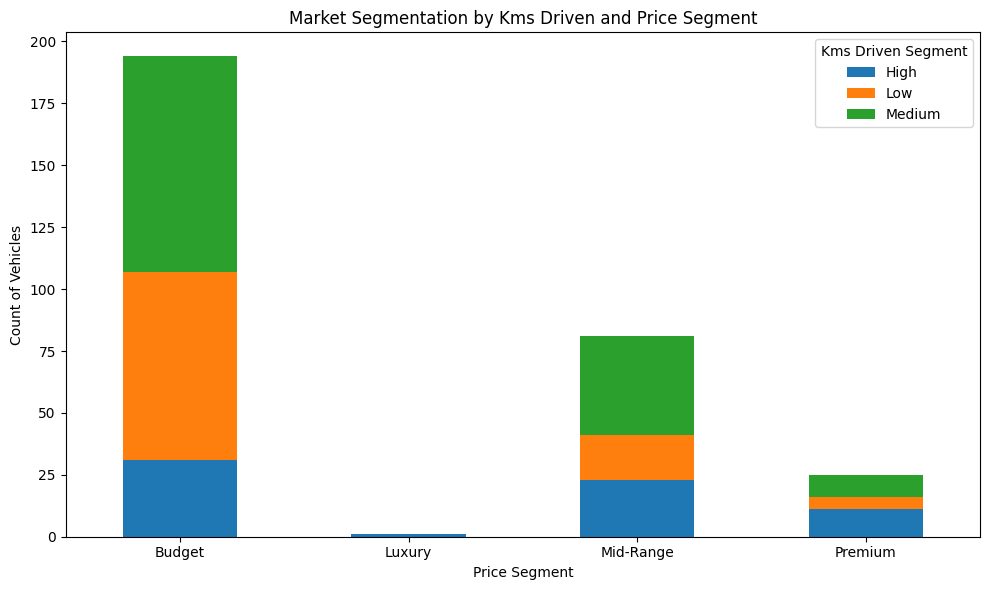

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already created the DataFrame 'df' with the given data
# Assuming you have already created the 'Kms_Driven_Segment' column

# You can create a pivot table to count the number of entries in each segment combination
segment_counts = dframe.pivot_table(index='Price_Segment', columns='Kms_Driven_Segment', values='Car_Name', aggfunc='count', fill_value=0)

# Create a bar chart to visualize the segmentation
segment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Market Segmentation by Kms Driven and Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Count of Vehicles')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Kms Driven Segment')

# Show the plot
plt.tight_layout()
plt.show()

###**Transmission Segmentation**

In [ ]:
# Let's focus on the 'Kms_Driven' and 'Transmission' columns for segmentation analysis
segmentation_data = dframe[['Kms_Driven', 'Transmission']]

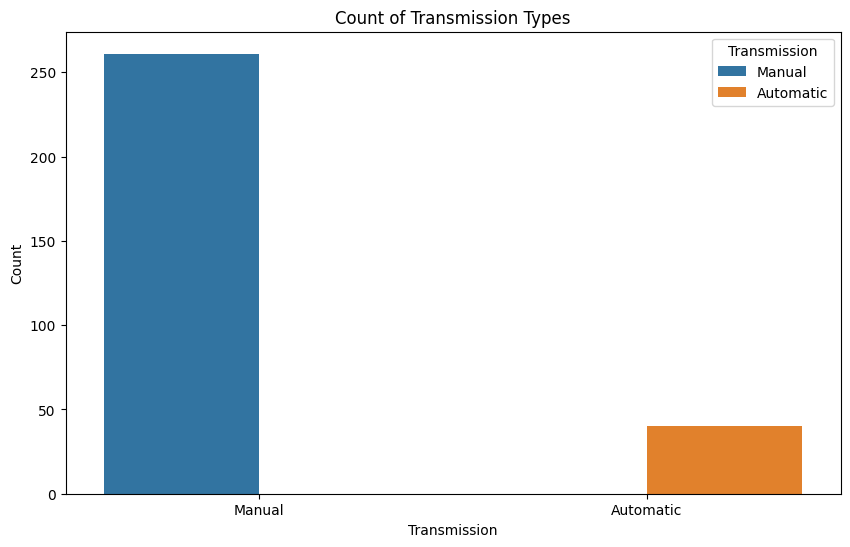

In [ ]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=segmentation_data, x='Transmission', hue='Transmission')
plt.title('Count of Transmission Types')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()

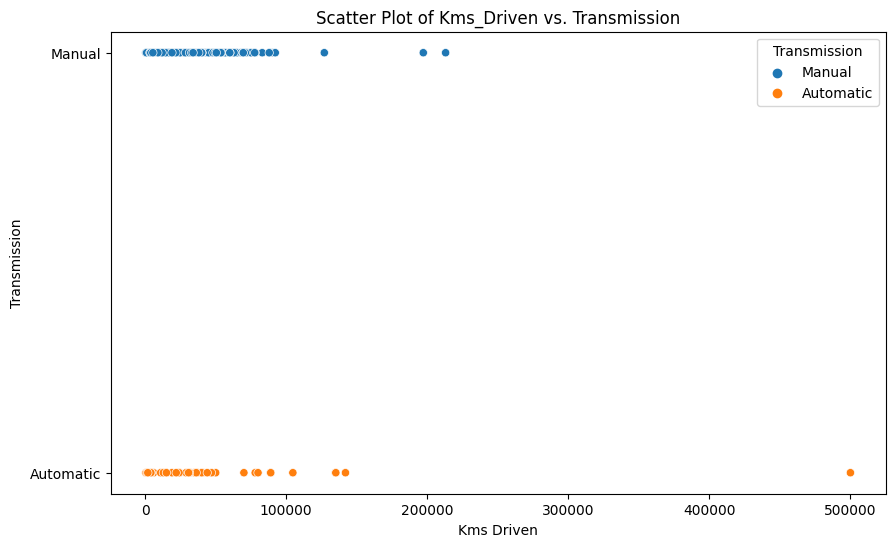

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=segmentation_data, x='Kms_Driven', y='Transmission', hue='Transmission')
plt.title('Scatter Plot of Kms_Driven vs. Transmission')
plt.xlabel('Kms Driven')
plt.ylabel('Transmission')
plt.show()

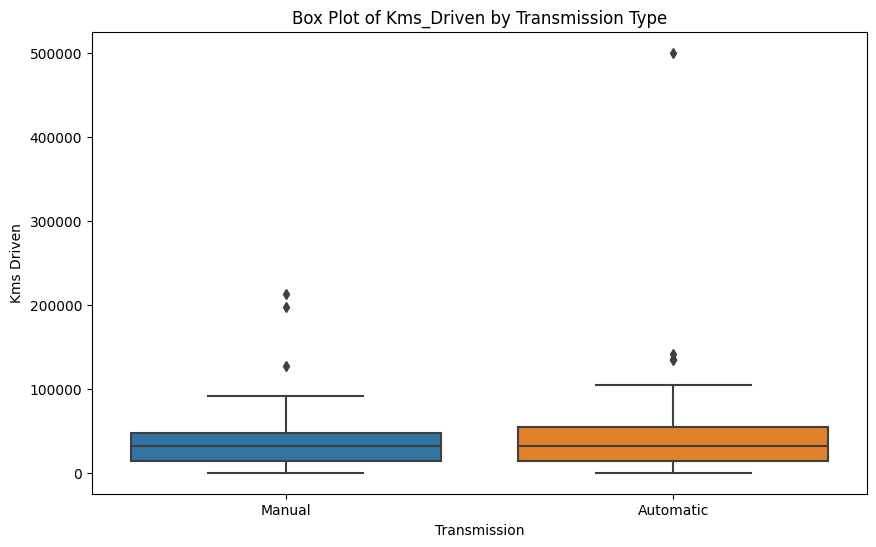

In [ ]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=segmentation_data, x='Transmission', y='Kms_Driven')
plt.title('Box Plot of Kms_Driven by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Kms Driven')
plt.show()

###**K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Separate numerical and categorical columns
numerical_cols = dframe.select_dtypes(include=['number']).columns.tolist()
categorical_cols = dframe.select_dtypes(exclude=['number']).columns.tolist()

# Create a preprocessor to scale numerical and one-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create a KMeans pipeline
kmeans_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=5))  # You can adjust the number of clusters
])

In [ ]:
# Fit the pipeline to your data
kmeans_pipeline.fit(dframe)

# Add cluster labels to the original dataset
dframe["Cluster_Label"] = kmeans_pipeline.named_steps["kmeans"].labels_

# Analyze cluster sizes
cluster_sizes = dframe["Cluster_Label"].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)


Cluster Sizes:
1    125
4     97
0     54
2     14
3     11
Name: Cluster_Label, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


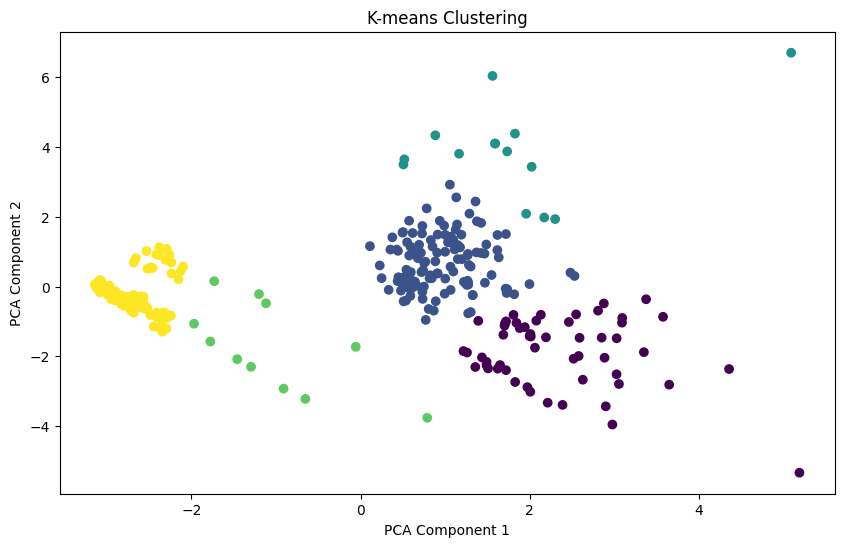

In [ ]:
# Plot the clusters (2D PCA projection for visualization)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(kmeans_pipeline.named_steps["preprocessor"].transform(dframe))

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dframe["Cluster_Label"], cmap="viridis")
plt.title("K-means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()